# Optimización de volumen de un depósito cilíndrico

Este documento presenta el problema matemático que se va a resolver con la funcionalidad de Solidworks.

Se dispone de una chapa de dimensiones $l \times l$ (siendo $l=200mm$), y con ella se quiere construir un depósito cilíndrico abierto por su extremo superior.  Se necesita aprovechar bien el material y obtener un depósito con la máxima capacidad.

Está claro que hay que recortar una tapa circular y un rectángulo que ocupen la mayor parte de la chapa, pero la incógnita es saber si compensa hacer la tapa más grande a costa de la altura de las paredes o viceversa.

Llamando $h$ a la altura del depósito, y $d$ al diámetro de la chapa, calculemos el volumen:

<img src="lata.svg.png" alt="Drawing" style="width: 400px;"/>

Manejaremos una librería CAS (Computer Algebra System) que nos permite hacer los cálculos simbólicamente, es decir, con expresiones algebraicas en lugar de cantidades numéricas como es habitual con ordenadores.  El nombre de la librería es Sympy (Symbolic Python).

Primero hay que crear las variables simbólicas.  Una forma de hacerlo es importar algunos de los nombres más comunes desde la propia librería:

In [1]:
import sympy

In [2]:
from sympy.abc import d, l, h

También están disponibles constantes como $\pi$

In [3]:
from sympy import pi

Finalmente también importamos el símbolo $r$, que representa al radio de la tapa, y puede ser más cómodo en ciertas ocasiones:

In [4]:
from sympy.abc import r

Cuando se calcula una expresión que involucre a variables simbólicas, el resultado también es una variable simbólica, por lo que no tenemos que declarar $A$ de antemano:

In [5]:
A=pi*r**2

Ejemplo de cómo se puede sustituir una variable en una expresión.  En este caso hacemos la sustitución $d=\frac{r}{2}$

In [6]:
A=A.subs({r:d/2})

In [7]:
A

pi*d**2/4

In [8]:
V=A*h

In [9]:
V=V.subs({h: l-d})

In [10]:
V

pi*d**2*(-d + l)/4

In [11]:
import matplotlib.pyplot as plt

In [12]:
import numpy as np

In [24]:
values_x = np.arange(0, 220, 10)

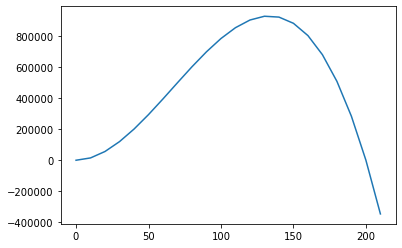

In [25]:
plt.plot(values_x, [V.subs({l: 200, d: x}).evalf() for x in values_x])

In [26]:
ecuacion_optimizar = sympy.diff(V, d)

In [27]:
ecuacion_optimizar

-pi*d**2/4 + pi*d*(-d + l)/2

In [28]:
soluciones = sympy.solve(ecuacion_optimizar, d)

In [29]:
d_max = soluciones[1]

In [30]:
d_max.subs({l:200}).evalf()

133.333333333333

In [20]:
h_max = l - d_max

In [21]:
h_max

l/3

In [22]:
h_max.subs({l:200})

200/3

Realmente, la solución está restringida al máximo $\pi d < l$, con lo que $d < \frac{l}{\pi} = \frac{200mm}{\pi} = 63.662mm$